In [27]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
from dotenv import load_dotenv
from datetime import date

from waterfall_ax import WaterfallChart
import matplotlib.pyplot as plt

load_dotenv()

True

#### Import the files with the forecasts

In [28]:
# Path to files

old_forecast_path =  "/Users/mhausch/Data/Prod_Dashboards/Data/volume_forecast_Q4_2023.csv"

new_forecast = "../Data/volume_forecast_Q1_2024.csv"

In [29]:
#Read in data

old_forecast_import = pd.read_csv(old_forecast_path)

new_forecast_import = pd.read_csv(new_forecast)

In [30]:
new_forecast_import.head(2)

,Entity,Country,Product,Forecast_Category,Submission date,Committ,Quarter,Forecast_Value,Submission_quarter
0,France,Country,G360CDx,Volume,2023-12-09,First submission,Q1 2024,50.0,Q1_2024
1,France,Country,G360 Infinity,Volume,2023-12-09,First submission,Q1 2024,0.0,Q1_2024


In [31]:
# Input for function: old + newdataframe , value to group by

In [32]:
new_forecast_by_product = new_forecast_import.groupby(["Product"])["Forecast_Value"].sum()
new_forecast_by_product

Product
G360 Infinity     357.0
G360CDx          2641.0
Reveal            265.0
Shield            100.0
Name: Forecast_Value, dtype: float64

In [33]:
new_forecast_by_product.index.to_list()

['G360 Infinity', 'G360CDx', 'Reveal', 'Shield']

In [34]:
old_forecast_by_product = old_forecast_import.groupby(["Product"])["Forecast_Value"].sum()

In [35]:
total_new_forecast = new_forecast_by_product.sum()
total_old_forecast = old_forecast_by_product.sum()
difference_forecasts = total_new_forecast - total_old_forecast
total_new_forecast, total_old_forecast, difference_forecasts

(3363.0, 3234.0, 129.0)

In [36]:
type(difference_forecasts)

numpy.float64

In [37]:
gap = pd.DataFrame()
gap["Difference"] = new_forecast_by_product - old_forecast_by_product

In [38]:
gap_list = gap["Difference"].to_list()
gap_list

[0.0, 129.0, 0.0, 0.0]

In [39]:
gap_list.insert(0,total_old_forecast)

In [40]:
#gap_list.append(total_new_forecast)

In [41]:
gap_list

[3234.0, 0.0, 129.0, 0.0, 0.0]

In [42]:
temp_df = pd.Series(gap_list)
temp_df = temp_df.cumsum()
result_list_final = temp_df.to_list()

In [43]:
result_list_final

[3234.0, 3234.0, 3363.0, 3363.0, 3363.0]

In [44]:
# create the labels for the waterfall plot

lables_series = new_forecast_by_product.index.to_list()
lables_series.insert(0, "Old Forecast")
lables_series

['Old Forecast', 'G360 Infinity', 'G360CDx', 'Reveal', 'Shield']

/Users/mhausch/Data/Prod_Dashboards/venv/lib/python3.9/site-packages/waterfall_ax/waterfall_ax.py:121: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = '{:,}'.format(int(df_plot[self.delta_col][i]))


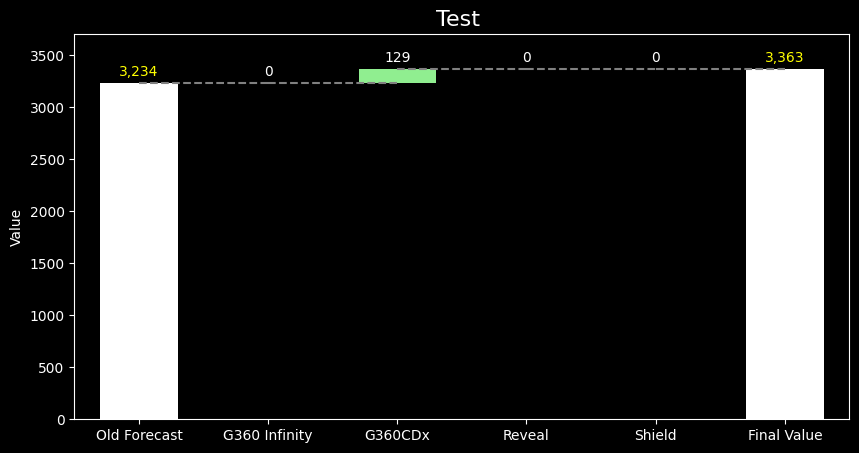

In [45]:
plt.style.use('dark_background')

step_names = lables_series
# Plot
waterfall = WaterfallChart(result_list_final, step_names=step_names)
color_kwargs = {
    'c_bar_pos': 'lightgreen',
    'c_bar_neg': 'red',
    'c_bar_start': 'white',
    'c_bar_end': 'white',
    'c_text_pos': 'white',    
    'c_text_neg': 'white',
    'c_text_start': 'yellow',
    'c_text_end': 'yellow'
}
wf_ax = waterfall.plot_waterfall(title=f'Test ' , color_kwargs=color_kwargs)
plt.savefig(f"../Plots/test.pdf")